# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 
                            'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8)})
from matplotlib_venn import venn2

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [3]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [4]:
%%time
# DL data ATG7 isoform expression
path = output_file_directory + "ATG7/TCGA_GTEX/"
path2 = 'all_tissues/dataframes_for_input/'
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_all.csv', sep = ",")
df_ATG7_Primary = pandas.read_csv(path+path2+'df_ATG7_Primary_all.csv', sep = ",")

#remove Survival information
dfs = df_ATG7_Normal, df_ATG7_Primary
for df in dfs:
    df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
df_ATG7_Normal.head(2)

(7401, 20)
Wall time: 76.8 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-ZTTD-0326-SM-57WFW,Normal Tissue,Muscle,5.042,3.860,2.390,0.2642,32.944283,14.519306,5.240574,1.199970,5.085097,3.955992,2.641679,20.95985,69.271996,25.002916,5.725088,0.440723,0.159074
1,GTEX-PX3G-1626-SM-2S1PT,Normal Tissue,Muscle,4.252,2.322,1.956,1.1320,19.052710,4.999249,3.878848,2.190624,4.325725,2.584782,2.286540,11.06872,45.165557,35.043325,19.791118,0.262390,0.203585


In [5]:
#Only select pancreas
df_norm_pancreas = df_ATG7_Normal[df_ATG7_Normal['Primary_Site'] == 'Pancreas']
print(df_norm_pancreas.shape)
df_prim_pancreas = df_ATG7_Primary[df_ATG7_Primary['Primary_Site'] == 'Pancreas']
print(df_prim_pancreas.shape)

(167, 20)
(178, 20)


In [7]:
%%time
# DL data ATG7 isoform expression
df_NormPrim_pancreas_pancreas = pandas.concat([df_norm_pancreas, df_prim_pancreas], axis=0)
print(df_NormPrim_pancreas_pancreas.shape)
df_NormPrim_pancreas_pancreas.head(2)

(345, 20)
Wall time: 3.99 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
6161,GTEX-WFON-0626-SM-4LVLX,Normal Tissue,Pancreas,3.259,2.064,0.6239,0.240,9.572192,4.180440,1.540035,1.179993,3.402203,2.373075,1.344849,6.900468,60.581980,22.317838,17.100182,0.436728,0.160886
6162,GTEX-146FH-1826-SM-5QGQ7,Normal Tissue,Pancreas,3.216,2.635,-1.4700,-9.966,9.291070,6.210751,0.359982,0.000000,3.363321,2.850150,0.443588,6.570733,94.521429,5.478571,0.000000,0.668465,0.038745


# III] ATG7 expression

## A) ATG7 expression

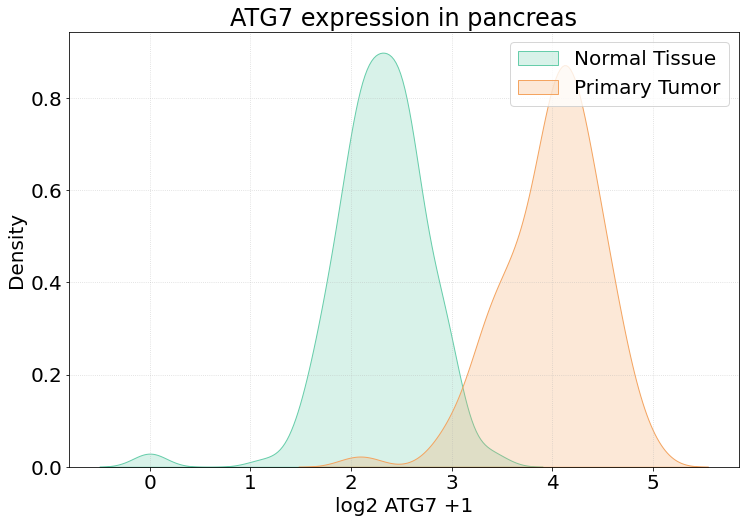

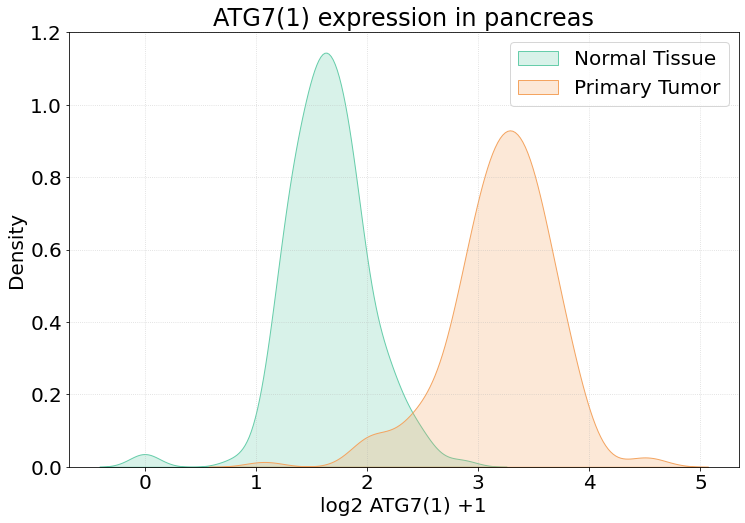

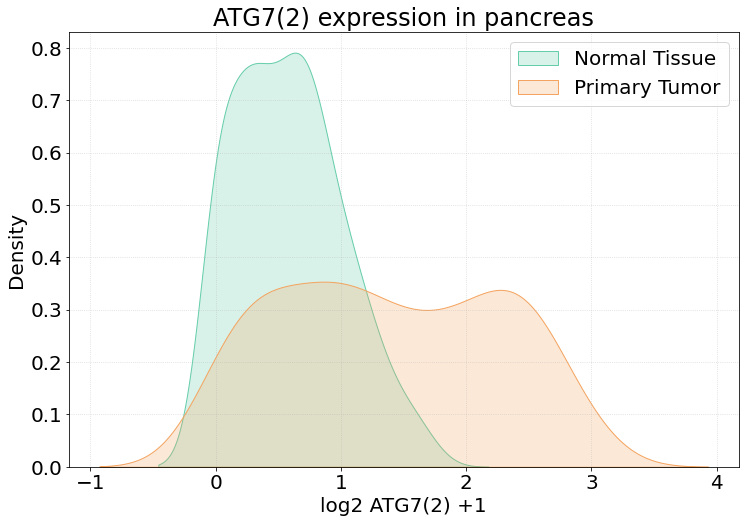

<Figure size 864x576 with 0 Axes>

In [9]:
# Distribution graph, for ATG7, iso1 & iso2
isoforms = 'log2_p1_ATG7_total', 'log2_p1_ATG7_1', 'log2_p1_ATG7_2'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'

for i in range(len(isoforms)):
    isoform = isoforms[i]
    xData = df_norm_pancreas[isoform]
    x2Data = df_prim_pancreas[isoform]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
    seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

    plt.xlabel('log2 '+ isoforms_info[i] + ' +1')
    plt.title(f'{isoforms_info[i]} expression in pancreas')
    plt.legend(labels=["Normal Tissue","Primary Tumor"])
    title_file = f'distrib_{isoforms_info[i]}_pancreas'
    
    path2 = 'Organ_specific/pancreas/characterization/'
    plt.savefig(path+path2+title_file+'.svg')
    plt.show()
    plt.clf()

## B) Percentage do not express ATG7 isoforms

In [10]:
#Percentage of patients: 
all_dfs = [[df_norm_pancreas, 'pancreas'], [df_prim_pancreas, 'PAAD']]

isoforms = [['ATG7_total', 'ATG7'], ['ATG7_1tpm', 'ATG7(1)'], 
            ['ATG7_2tpm', 'ATG7(2)'], ['ATG7_3tpm', 'ATG7(3)']]

for df in all_dfs:
  print(df[1].upper())
  for isoform in isoforms:
        
    what = isoform[1]
    all_ = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all_
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'% of tumor do not express', what)
  print()


PANCREAS
1.2 % of tumor do not express ATG7
1.2 % of tumor do not express ATG7(1)
17.4 % of tumor do not express ATG7(2)
65.9 % of tumor do not express ATG7(3)

PAAD
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
8.4 % of tumor do not express ATG7(2)
37.1 % of tumor do not express ATG7(3)



In [12]:
#Percentage of patients: 
all_dfs = [[df_norm_pancreas, 'Pancreas'], [df_prim_pancreas, 'PAAD']]

isoforms = [['ATG7_total', 'ATG7'], ['ATG7_1tpm', 'ATG7(1)'], 
            ['ATG7_2tpm', 'ATG7(2)']]

df_number_exp = []
what = []
sample_type = []
who_dontexp = []
perc_noexp = []
    
for df in all_dfs:
    for isoform in isoforms:
        #save what isoform
        what.append(isoform[1])
        #save sample_type
        sample_type.append(df[1])
        #have total sample number
        all_ = (df[0][isoform[0]]).shape
        #calculate number of sample who express the isoform
        without_exp = (df[0][isoform[0]]<0.1).sum()
        who_dontexp.append(without_exp)
        #convert result to percentage
        perc_without_exp = float((without_exp*100)/all_)   
        perc_noexp.append(round(perc_without_exp,1))

        #create a dictionnary and convert to dataframe
        d = dict(Isoforms = what, who_dontexp = who_dontexp, 
                 Percentage = perc_noexp, Sample_Type = sample_type)
        df_noexpr_distrib = pandas.DataFrame.from_dict(d, orient='index')
        df_noexpr_distrib = df_noexpr_distrib.T
          
df_noexpr_distrib


,Isoforms,who_dontexp,Percentage,Sample_Type
0,ATG7,2,1.2,Pancreas
1,ATG7(1),2,1.2,Pancreas
2,ATG7(2),29,17.4,Pancreas
3,ATG7,0,0,PAAD
4,ATG7(1),0,0,PAAD
5,ATG7(2),15,8.4,PAAD


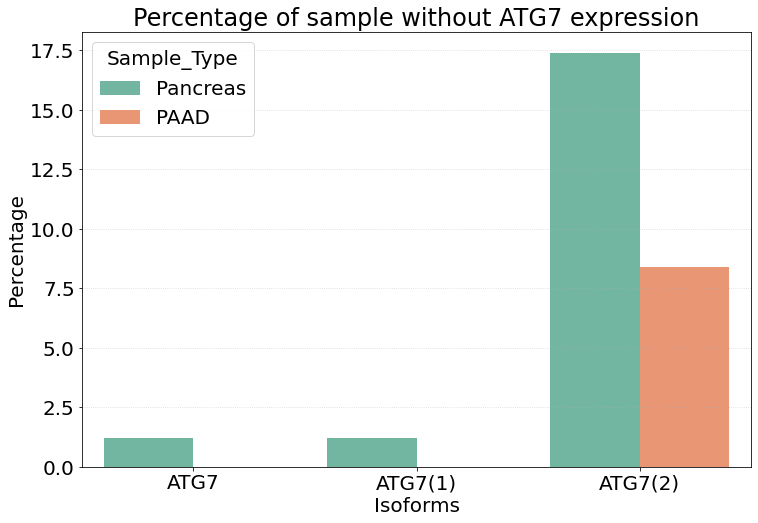

In [13]:
seaborn.barplot(data=df_noexpr_distrib, x="Isoforms", y="Percentage", hue="Sample_Type", 
                palette = 'Set2', orient = 'v')
plt.title("Percentage of sample without ATG7 expression")
plt.yticks(fontsize=20)


plt.savefig(path+path2+'percentage_expression.svg')

## D) Correlation between the two isoforms

The correlation between iso1 and iso2 in Pancreas is: 0.0013454909536674987, 0.9863155465184248


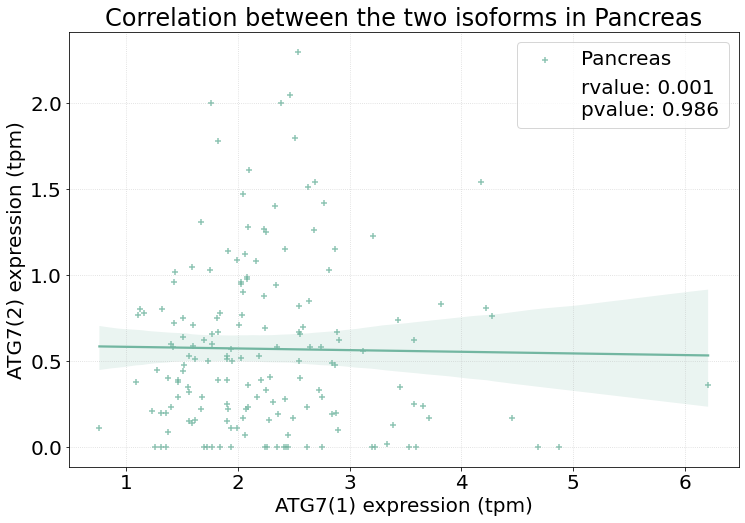


The correlation between iso1 and iso2 in PAAD is: -0.1971677310083744, 0.008340651185633909


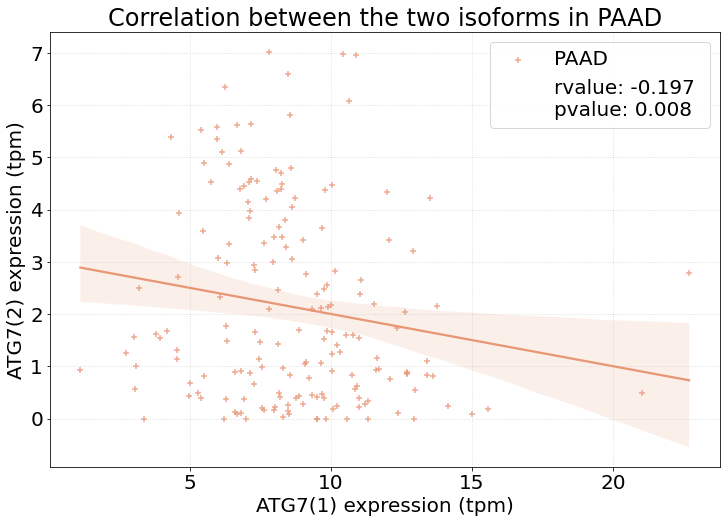

<Figure size 864x576 with 0 Axes>

In [32]:
#Graph and stats_ spearman correlation
dfs = df_final[0], df_final[1]
infos = "Pancreas", "PAAD"
pvalue_texts = '0.986', '0.008'
colors_ = '#72B6A1', '#e99675'

for i in range(len(dfs)): 
    df = dfs[i]
    info = infos[i]
    pvalue_text = pvalue_texts[i]
    color_ = colors_[i]
    
    x = df['ATG7_1tpm'].to_list()
    y = df['ATG7_2tpm'].to_list()    
    
    #stat Spearman correlation 
    r_value, p_value = scipy.stats.spearmanr(x, y)
    print(f'The correlation between iso1 and iso2 in {info} is: {r_value}, {p_value}')
    
    #graph
    seaborn.regplot(x=x,y=y, x_ci = 0, marker="+", label = info, color = color_)
    seaborn.regplot(x=[],y=[], marker=" ", 
                    label= f'rvalue: {str(round(r_value,3))} \npvalue: {str(pvalue_text)}')

    plt.title(f'Correlation between the two isoforms in {info}')
    plt.xlabel("ATG7(1) expression (tpm)")
    plt.ylabel('ATG7(2) expression (tpm)')

    plt.grid(ls = ":", alpha=0.5)
    plt.legend()

    #save
    title_file = 'ATG7s_corr_tpm_' + info
    plt.savefig(path+path2+title_file+'.svg')

    plt.show()  
    plt.clf()
    print()